##### 
<span style='color:#FF5733'>   **'*'** **DISCLAIMER**</span>:
    -This project is a sole Intellectual property of mine i.e. <span style='color:#FF5733'>**GANDHARV GUPTA**</span>.Kindly acknowledge before copy or use of this project.The dataset is    open and is a property of Kaggle which holds all proprietary rights over it.</span>

#                                                REGRESSION MODEL DESCRIPTION

DATASET-Car prices data set

INDEPENDENT VARIABLES:

    -Brand: Specifies the brand of car
    -Model:The specific car model of a brand
    -Year:Year of manufacturing(The older the cheaper)
    -Engine_size:Capacity of engine(high capacity implies costlier car)
    -Fuel type: Petrol,Diesel,Electric,Hybrid
    -Transmission:Manual,Automatic,Semi-Autoatic
    -Mileage:Total distance travelled by car till date(higher mileage implies cheaper price)
    -Doors:No of doors(2,3,4)
    -Owner count:Number of Pre-owners of car(higher count implies cheaper car)

DEPENDENT VARIABLE/TARGET VARIABLE:

    -PRICE



In [5]:
description_dict={
    'Brand':['Specifies the brand of car'],
    'Model':['The specific car model of a brand'],
    'Year':['Year of manufacturing'],
    'Engine_size':['Capacity of engine'],
    'Fuel type':['Petrol,Diesel,Electric,Hybrid'],
    'Transmission':['Manual,Automatic,Semi-Autoatic'],
    'Mileage':['Total distance travelled by car till date'],
    'Doors':['No of doors(2,3,4)'],
    'Owner count':['Number of Pre-owners of car'],
    'Price':['Pre-known price of the car']
}
import pandas as pd
description=pd.DataFrame(description_dict)
description

,Brand,Model,Year,Engine_size,Fuel type,Transmission,Mileage,Doors,Owner count,Price
0,Specifies the brand of car,The specific car model of a brand,Year of manufacturing,Capacity of engine,"Petrol,Diesel,Electric,Hybrid","Manual,Automatic,Semi-Autoatic",Total distance travelled by car till date,"No of doors(2,3,4)",Number of Pre-owners of car,Pre-known price of the car


### <u>Problem Statement</u>: 
    -Predicting price of a car based on a model trained over LABELLED data


### <u>Model Selection</u>:
    -The problem already has labelled data and requires prediction of a CONTINOUS NUMERICAL Variable,Hence,We will make a SUPERVISED LEARNING based REGRESSION MODEL

### <u>Data Source</u>:**MYSQL** Database
    -A Kaggle based UNCLEEANED Car-Price dataset is pre-loaded in mysql database
    -File Type: A FLAT FILE(.CSV) 

## Importing requisite **Libraries:**

In [6]:
import pandas as pd     # For data manipulation,cleaning and transformation
import numpy as np      #For Scientific mathematical calculation and its usage in matplotlib+For polynomial regression model development
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns       # For advanced visualizations like regplot,residualplot,distplot and boxplot
from scipy import stats     # For calculating Correlation coef and Pearson value
from sklearn.linear_model import LinearRegression   #For SLR and MLR model construction
from sklearn.metrics import mean_squared_error      # For Regresison model evaluation
from sklearn.metrics import r2_score                # For Regression model evaluation
from sklearn.model_selection import train_test_split # For Out-Sample evaluation and Model Testing and refinement
from sklearn.model_selection import cross_val_score,cross_val_predict # For model Refinement
from sklearn.linear_model import Ridge      # For hyperparemeter tuning using alpha and ridge down an Overfit model
import warnings
warnings.filterwarnings('ignore')           # To ignore warnings for a clean code       

## 1. **DATA COLLECTION**:
    -The data is loaded in MYSQL Database using Mysql Work bench

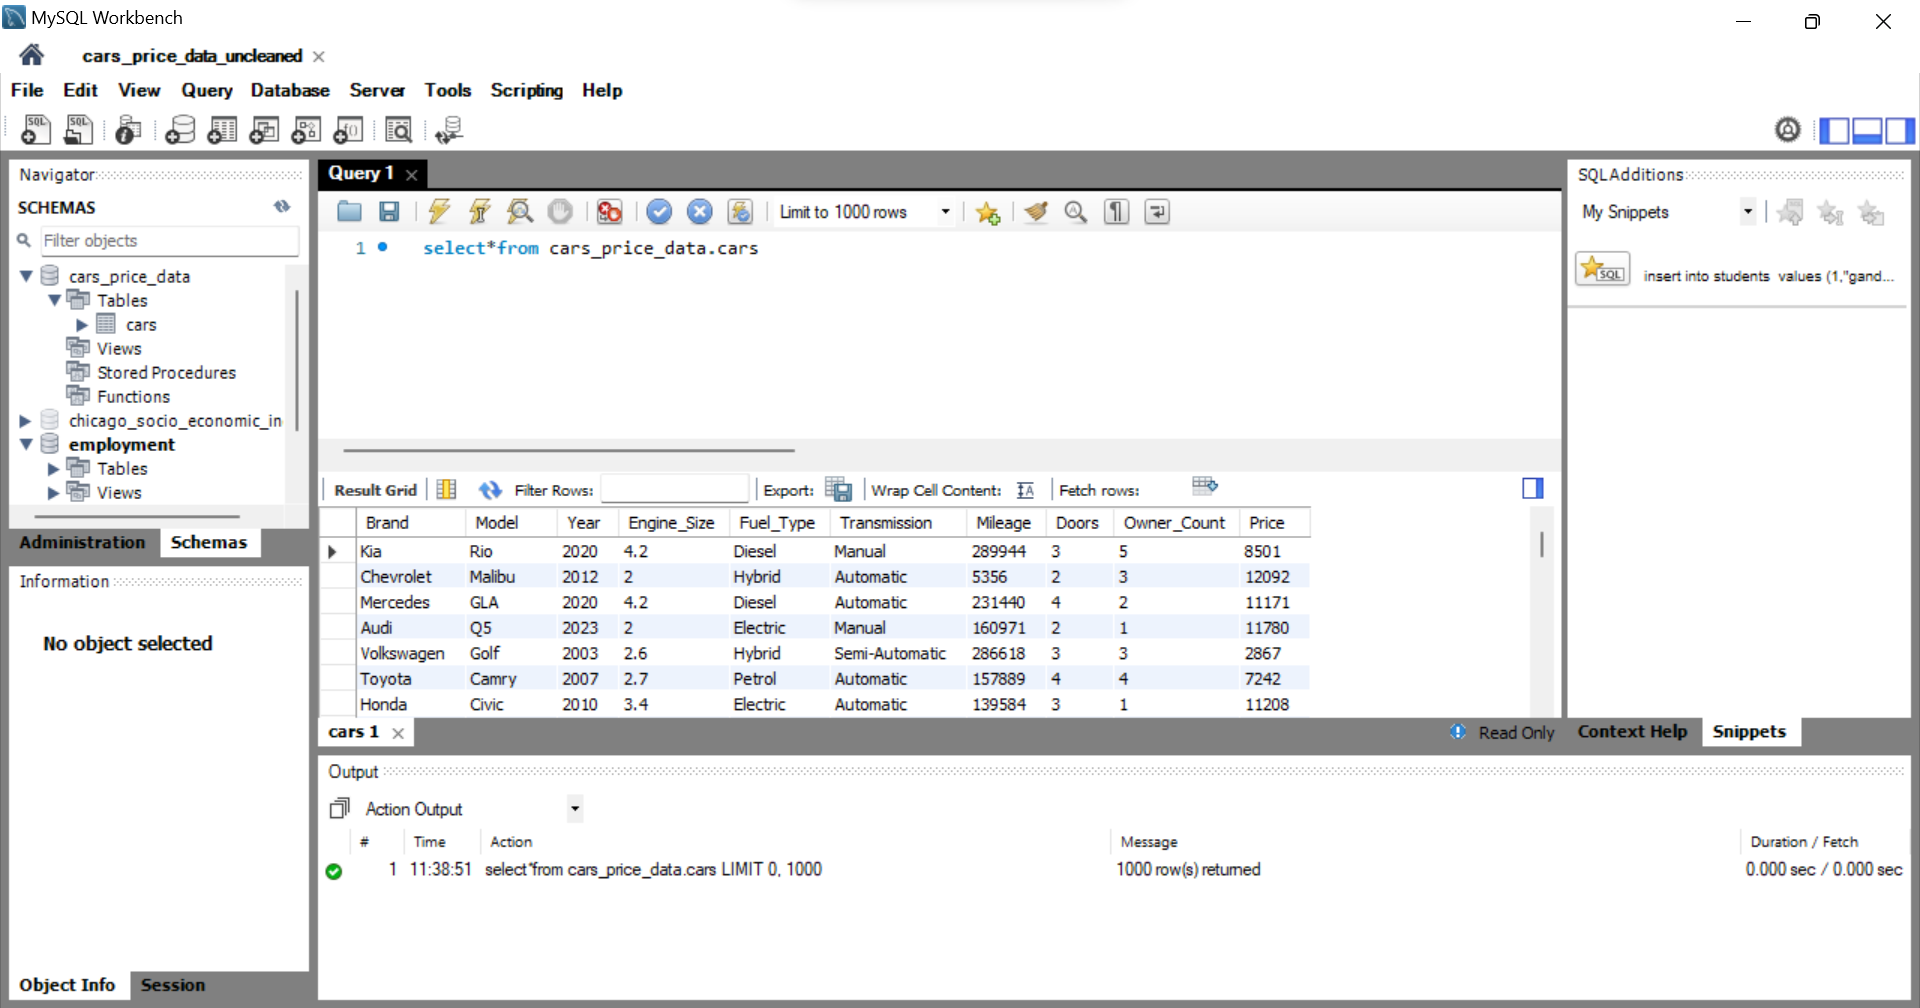

In [7]:
from IPython.display import Image
Image(filename=r"C:\Users\HP\Desktop\CODE\Data Science Projects\1.Data Analysis and Regression for Price Determination\sql_databse_data.png",width=800, height=400)

### <u>1.1 Connecting python code to mysql database using DATABASE-API and **EXTRACTING** data </u>

In [8]:
import mysql.connector
conn_object=mysql.connector.connect(host='localhost',user='root',password='Gandharv_Database',database='cars_price_data')
cur=conn_object.cursor()
sql_query='SELECT * FROM cars_price_data.cars'
cur.execute(sql_query)
results=cur.fetchall()
few_results=results[0:10]
for i in few_results:
    print(i)

#NOTE-The database must pre-exist before connection

('Kia', 'Rio', '2020', 4.2, 'Diesel', 'Manual', 289944, '3', 5, '8501')
('Chevrolet', 'Malibu', '2012', 2.0, 'Hybrid', 'Automatic', 5356, '2', 3, '12092')
('Mercedes', 'GLA', '2020', 4.2, 'Diesel', 'Automatic', 231440, '4', 2, '11171')
('Audi', 'Q5', '2023', 2.0, 'Electric', 'Manual', 160971, '2', 1, '11780')
('Volkswagen', 'Golf', '2003', 2.6, 'Hybrid', 'Semi-Automatic', 286618, '3', 3, '2867')
('Kia', 'Sportage', '2001', 4.7, 'Electric', '?', 139584, '2', 2, '7950')
('Kia', 'Sportage', '2014', 2.6, 'Hybrid', 'Manual', 139584, '3', 4, '9926')
('BMW', '?', '2013', 1.3, 'Hybrid', 'Automatic', 139584, '2', 3, '5863')
('Volkswagen', 'Golf', '2009', 4.5, 'Hybrid', 'Manual', 139584, '4', 3, '11444')
('Honda', 'CR-V', '2007', 4.8, 'Hybrid', 'Automatic', 139584, '3', 4, '10842')


In [64]:
df=pd.DataFrame(results)

In [65]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [66]:
df.columns=['brand','model','year','engine_size_in_litre','fuel_type','transmission','mileage_in_km','doors','owner_count','price']

In [67]:
df.shape

(9987, 10)

In [68]:
df.size

99870

In [69]:
df=df.replace('?',np.nan)   # Replacing missing values with null values for better accounting

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 9984 non-null   object 
 1   model                 9984 non-null   object 
 2   year                  9983 non-null   object 
 3   engine_size_in_litre  9987 non-null   float64
 4   fuel_type             9984 non-null   object 
 5   transmission          9979 non-null   object 
 6   mileage_in_km         9987 non-null   int64  
 7   doors                 9982 non-null   object 
 8   owner_count           9987 non-null   int64  
 9   price                 9984 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 780.4+ KB


------------

## 2. **DATA WRANGLING,PREPROCESSING and CLEANING**:

    -Treating Missing values
    -Data Standardization
    -Data Normalization by Feature Scaling(Z-Score)
    -One-Hot-Encoding(Categorical to numerical variable)

### <u>2.1 Treating Null vales and Standardization</u>:

    -Counting Null Values in each column:

In [71]:
for i in df.columns:
    print(df[i].isnull().value_counts(),'\n')

brand
False    9984
True        3
Name: count, dtype: int64 

model
False    9984
True        3
Name: count, dtype: int64 

year
False    9983
True        4
Name: count, dtype: int64 

engine_size_in_litre
False    9987
Name: count, dtype: int64 

fuel_type
False    9984
True        3
Name: count, dtype: int64 

transmission
False    9979
True        8
Name: count, dtype: int64 

mileage_in_km
False    9987
Name: count, dtype: int64 

doors
False    9982
True        5
Name: count, dtype: int64 

owner_count
False    9987
Name: count, dtype: int64 

price
False    9984
True        3
Name: count, dtype: int64 



    -Checking datatypes in each column:

In [72]:
df.dtypes

brand                    object
model                    object
year                     object
engine_size_in_litre    float64
fuel_type                object
transmission             object
mileage_in_km             int64
doors                    object
owner_count               int64
price                    object
dtype: object

<u>Year,Doors,Brand,Model,Fuel Type,Transmission and Owner Count columns:</u>

    -Replacing the missing values by 'MODE' in categorical columns

In [73]:
df['year'].value_counts().idxmax()

'2002'

In [74]:
df['doors'].value_counts().idxmax()

'3'

In [75]:
df['year']=df['year'].replace(np.nan,'2002')
df['doors']=df['doors'].replace(np.nan,'3')
df['year']=df['year'].astype(int)
df['doors']=df['doors'].astype(int)

In [76]:
brand_mode=df['brand'].value_counts().idxmax()
print(brand_mode)
df['brand'].replace(np.nan,brand_mode,inplace=True)
model_mode=df['model'].value_counts().idxmax()
print(model_mode)
df['model'].replace(np.nan,model_mode,inplace=True)
fuel_type_mode=df['fuel_type'].value_counts().idxmax()
print(fuel_type_mode)
df['fuel_type'].replace(np.nan,fuel_type_mode,inplace=True)
transmission_mode=df['transmission'].value_counts().idxmax()
print(transmission_mode)
df['transmission'].replace(np.nan,transmission_mode,inplace=True)
owner_count_mode=df['owner_count'].value_counts().idxmax()
print(owner_count_mode)
df['owner_count'].replace(np.nan,owner_count_mode,inplace=True)

Ford
Accord
Electric
Manual
5


<u>Price Column</u>:

    -Dropping the rows which have a missing value,given price itself is TARGET variable;Cars without a even price are of no use

In [77]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [78]:
df['price'].isnull().value_counts()

price
False    9984
Name: count, dtype: int64

In [79]:
df['price']=df['price'].astype(float)

<u>Checking if all Null values are treated:</u>

In [80]:
for i in df.columns:
    print(df[i].isnull().value_counts(),'\n')

brand
False    9984
Name: count, dtype: int64 

model
False    9984
Name: count, dtype: int64 

year
False    9984
Name: count, dtype: int64 

engine_size_in_litre
False    9984
Name: count, dtype: int64 

fuel_type
False    9984
Name: count, dtype: int64 

transmission
False    9984
Name: count, dtype: int64 

mileage_in_km
False    9984
Name: count, dtype: int64 

doors
False    9984
Name: count, dtype: int64 

owner_count
False    9984
Name: count, dtype: int64 

price
False    9984
Name: count, dtype: int64 



NO NULL VALUES FOUND

### <u>2.2 Data Normalization</u>:
    -Feature scaling of predictor variables using Z-SCORE

In [81]:
df.head()

,brand,model,year,engine_size_in_litre,fuel_type,transmission,mileage_in_km,doors,owner_count,price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501.0
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092.0
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171.0
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780.0
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867.0


### 

    -Scaling predictors based on Z-score using StandardScaler library and .fit_transform() method.
    -Creating a dataframe of it.
    -Concatenating it to the main DataFrame.


In [82]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
scaled_data=scale.fit_transform(df[['engine_size_in_litre','mileage_in_km','owner_count']])
scaled_df=pd.DataFrame(scaled_data)
scaled_df.columns=['engine_size_in_litre','mileage_in_km','owner_count']#Changing the column names
scaled_df.head()

,engine_size_in_litre,mileage_in_km,owner_count
0,1.043104,56.321403,1.411867
1,-0.870771,-50.298358,0.005774
2,1.043104,34.403113,-0.697272
3,-0.870771,8.002182,-1.400318
4,-0.348805,55.075331,0.005774


In [83]:
df.drop(['engine_size_in_litre','mileage_in_km','owner_count'],axis=1,inplace=True) #Dropping original columns
df=pd.concat([scaled_df,df],axis=1) #concatenaiting normalized columns into original dataframe

In [84]:
df.head()

,engine_size_in_litre,mileage_in_km,owner_count,brand,model,year,fuel_type,transmission,doors,price
0,1.043104,56.321403,1.411867,Kia,Rio,2020.0,Diesel,Manual,3.0,8501.0
1,-0.870771,-50.298358,0.005774,Chevrolet,Malibu,2012.0,Hybrid,Automatic,2.0,12092.0
2,1.043104,34.403113,-0.697272,Mercedes,GLA,2020.0,Diesel,Automatic,4.0,11171.0
3,-0.870771,8.002182,-1.400318,Audi,Q5,2023.0,Electric,Manual,2.0,11780.0
4,-0.348805,55.075331,0.005774,Volkswagen,Golf,2003.0,Hybrid,Semi-Automatic,3.0,2867.0


### <u>2.3 One-Hot-Encoding</u>:
    -Converting categorical columns into numerical columns (for regression analysis later)
    -Using pd.get_dummies()

In [85]:
df2=pd.get_dummies(df['fuel_type'],dtype=int)
df2.columns=['fuel_Diesel','fuel_Electric','fuel_Hybrid','fuel_Petrol']
df2.head()

,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Petrol
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0


In [86]:
df.drop(['fuel_type'],axis=1,inplace=True)  #Dropping the original column
df=pd.concat([df2,df],axis=1)   #Concatenating the dummy table with the original table
df.head()

,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Petrol,engine_size_in_litre,mileage_in_km,owner_count,brand,model,year,transmission,doors,price
0,1,0,0,0,1.043104,56.321403,1.411867,Kia,Rio,2020.0,Manual,3.0,8501.0
1,0,0,1,0,-0.870771,-50.298358,0.005774,Chevrolet,Malibu,2012.0,Automatic,2.0,12092.0
2,1,0,0,0,1.043104,34.403113,-0.697272,Mercedes,GLA,2020.0,Automatic,4.0,11171.0
3,0,1,0,0,-0.870771,8.002182,-1.400318,Audi,Q5,2023.0,Manual,2.0,11780.0
4,0,0,1,0,-0.348805,55.075331,0.005774,Volkswagen,Golf,2003.0,Semi-Automatic,3.0,2867.0


### Data is Cleaned,Processed and transformed and is ready for **Exploration**

---------------------------------------

## 3. **Exploratory** **Data** **Analysis** and **Visualization**
                                                    (with Matplotlib and Seaborn):

### 3.1 <u>Determining Correlation among **'Numerical Columns'** with target varible</u>:
    -Making "Correlation matrix"
    -Visualizing "Heatmap" of Correlation
    -Plotting "Regression plots" of each predictor with target variable
    -Plotting "Residual plots" of predictors,strongly correlated with target variable
    -Plotting "Pair Plots"

<u>CORRELATION MATRIX</u>:

In [87]:
corr_matrix=df[['price','fuel_Diesel', 'fuel_Electric', 'fuel_Hybrid', 'fuel_Petrol',
       'engine_size_in_litre', 'mileage_in_km', 'owner_count',
        'year','doors']].corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix

,price,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Petrol,engine_size_in_litre,mileage_in_km,owner_count,year,doors
price,1.00,-0.14,0.23,0.05,-0.14,0.00,-0.01,0.00,0.66,0.00
fuel_Diesel,-0.14,1.00,-0.35,-0.33,-0.33,-0.00,0.01,0.01,0.01,-0.01
fuel_Electric,0.23,-0.35,1.00,-0.34,-0.34,0.01,-0.00,-0.00,-0.00,-0.00
fuel_Hybrid,0.05,-0.33,-0.34,1.00,-0.32,-0.01,-0.00,0.01,-0.01,-0.00
fuel_Petrol,-0.14,-0.33,-0.34,-0.32,1.00,0.01,-0.01,-0.01,-0.00,0.01
engine_size_in_litre,0.00,-0.00,0.01,-0.01,0.01,1.00,0.01,0.01,-0.00,0.01
mileage_in_km,-0.01,0.01,-0.00,-0.00,-0.01,0.01,1.00,0.00,0.01,0.00
owner_count,0.00,0.01,-0.00,0.01,-0.01,0.01,0.00,1.00,-0.00,0.01
year,0.66,0.01,-0.00,-0.01,-0.00,-0.00,0.01,-0.00,1.00,0.01
doors,0.00,-0.01,-0.00,-0.00,0.01,0.01,0.00,0.01,0.01,1.00


<u>HEAT-MAP of CORRELATION:</u>

<Axes: >

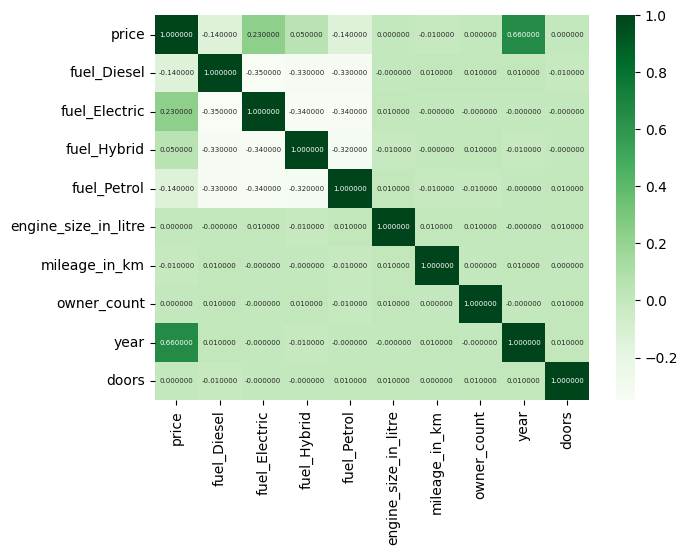

In [88]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix,annot=True,fmt='2f',cmap='Greens', annot_kws={"fontsize":5})

#### <u>Heatmap Conclusions</u>:
    -Year has STRONG POSITIVE CORRELATION with Price
    -Fuel_Diesel and Fuel_Petrol have WEAK(Yet significant) NEGATIVE CORRELATION WITH Price
    -Fuel_Electric has SIGNIFICANT POSITIVE CORRELATION with Price
    -Rest all have WEAK CORRELATIONS with Price and hence are not viable to become Predictor variables

<u>Regression Plots of All predictors with Price:</u>

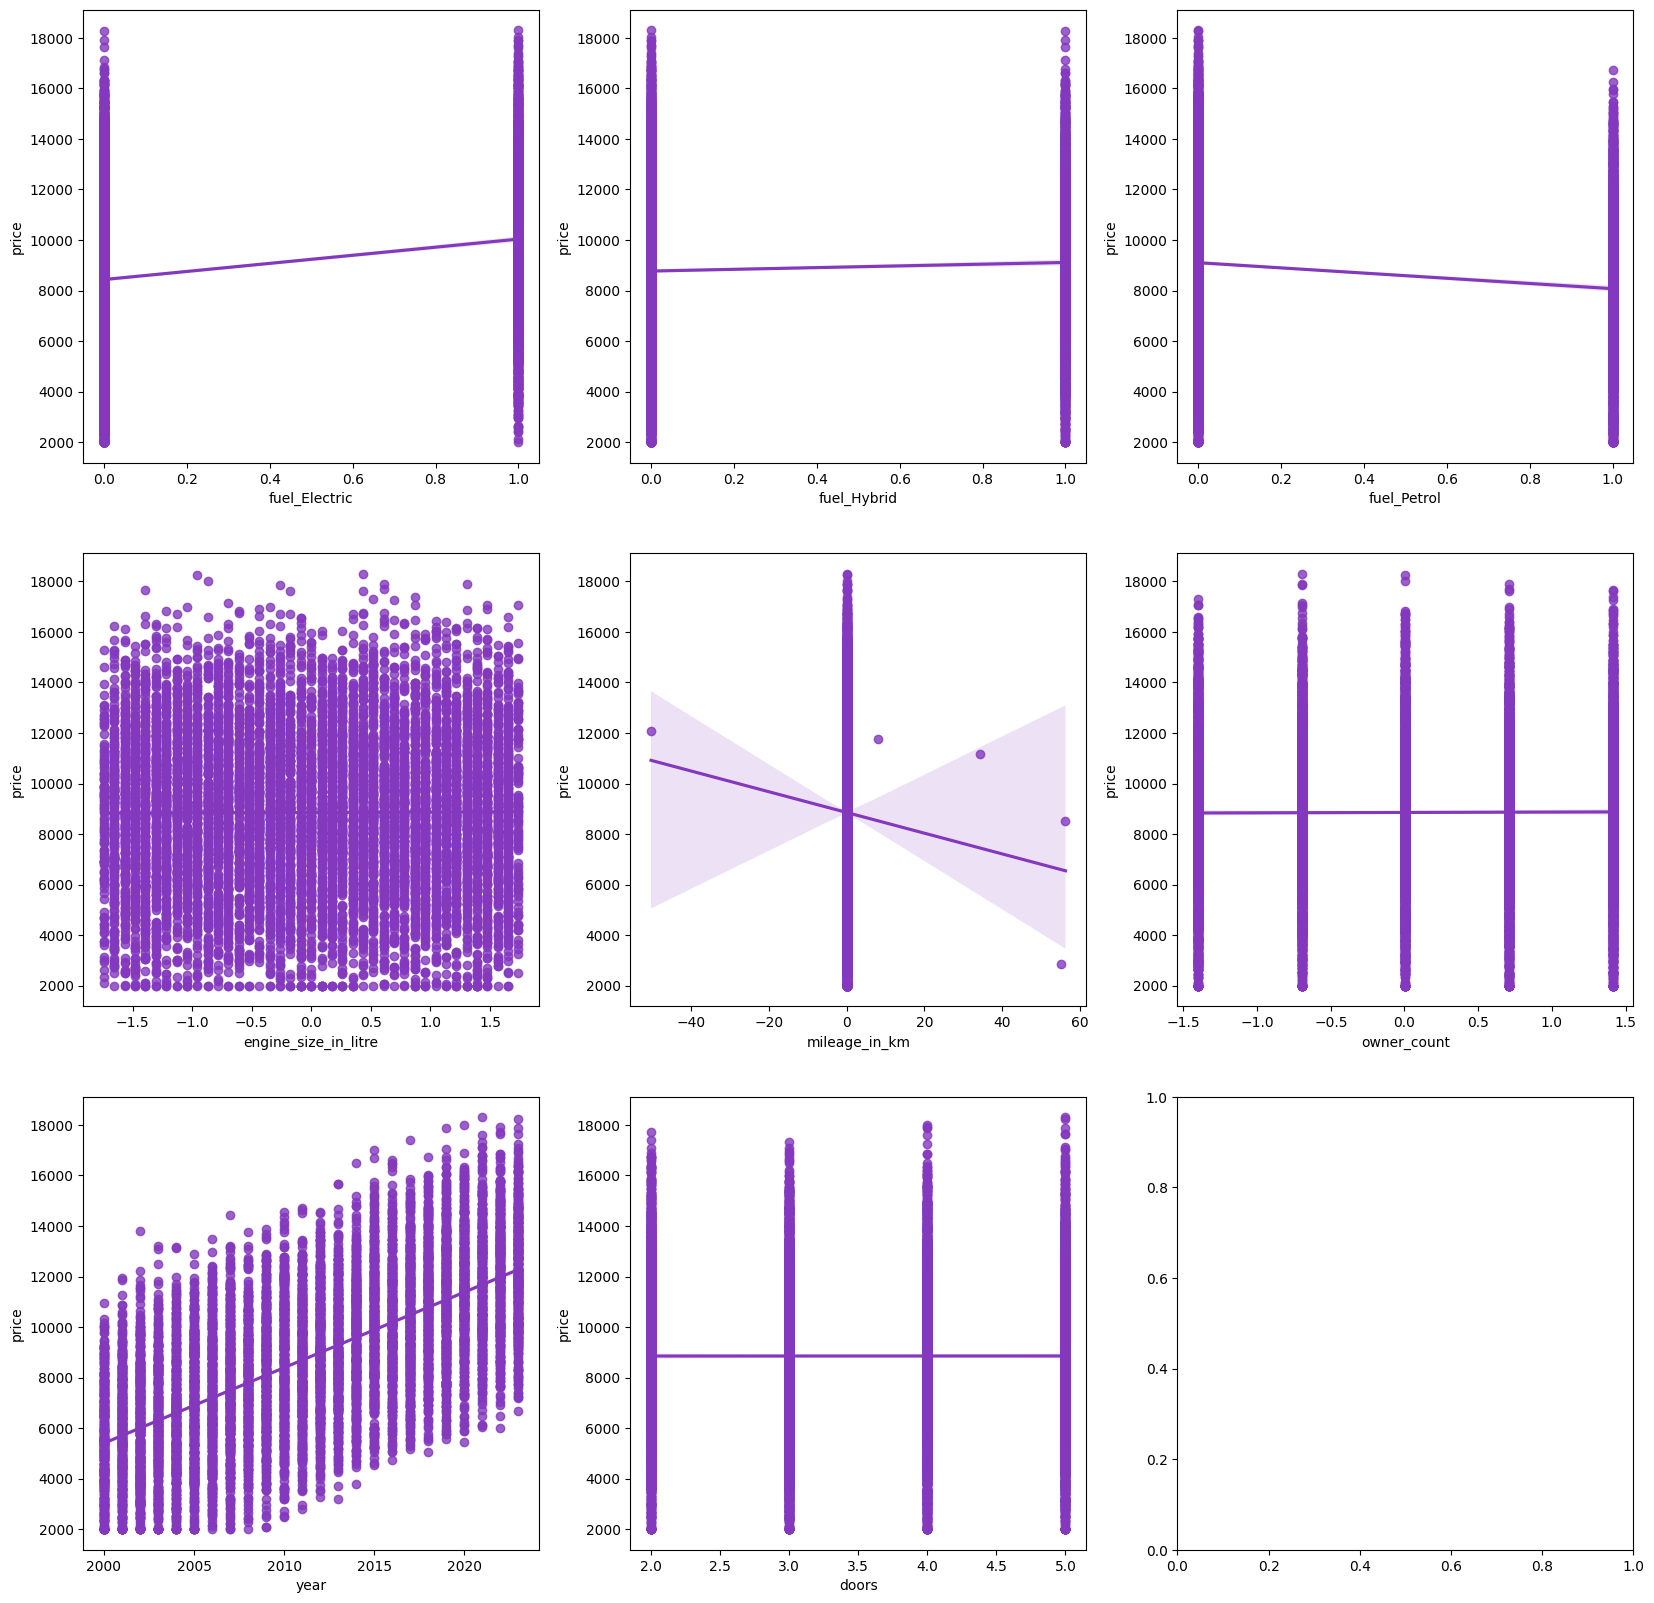

In [89]:
l=['fuel_Diesel', 'fuel_Electric', 'fuel_Hybrid', 'fuel_Petrol',
       'engine_size_in_litre', 'mileage_in_km', 'owner_count',
        'year','doors']
plt.subplots(3, 3, figsize=(20, 20))
for j in range(1,len(l)):
    plt.subplot(3,3,j)
    sns.regplot(x=l[j],y='price',data=df,color='#8338be')
        


#### <u>Regression Plot Conclusions</u>:
    -Year has STRONG POSITIVE CORRELATION with Price
    -Fuel_Diesel and Fuel_Petrol have WEAK(Yet significant) NEGATIVE CORRELATION WITH Price
    -Fuel_Electric has SIGNIFICANT POSITIVE CORRELATION with Price
    -Rest all have WEAK CORRELATIONS with Price and hence are not viable to become Predictor variables

<u>Pair Plots with Price:</u>

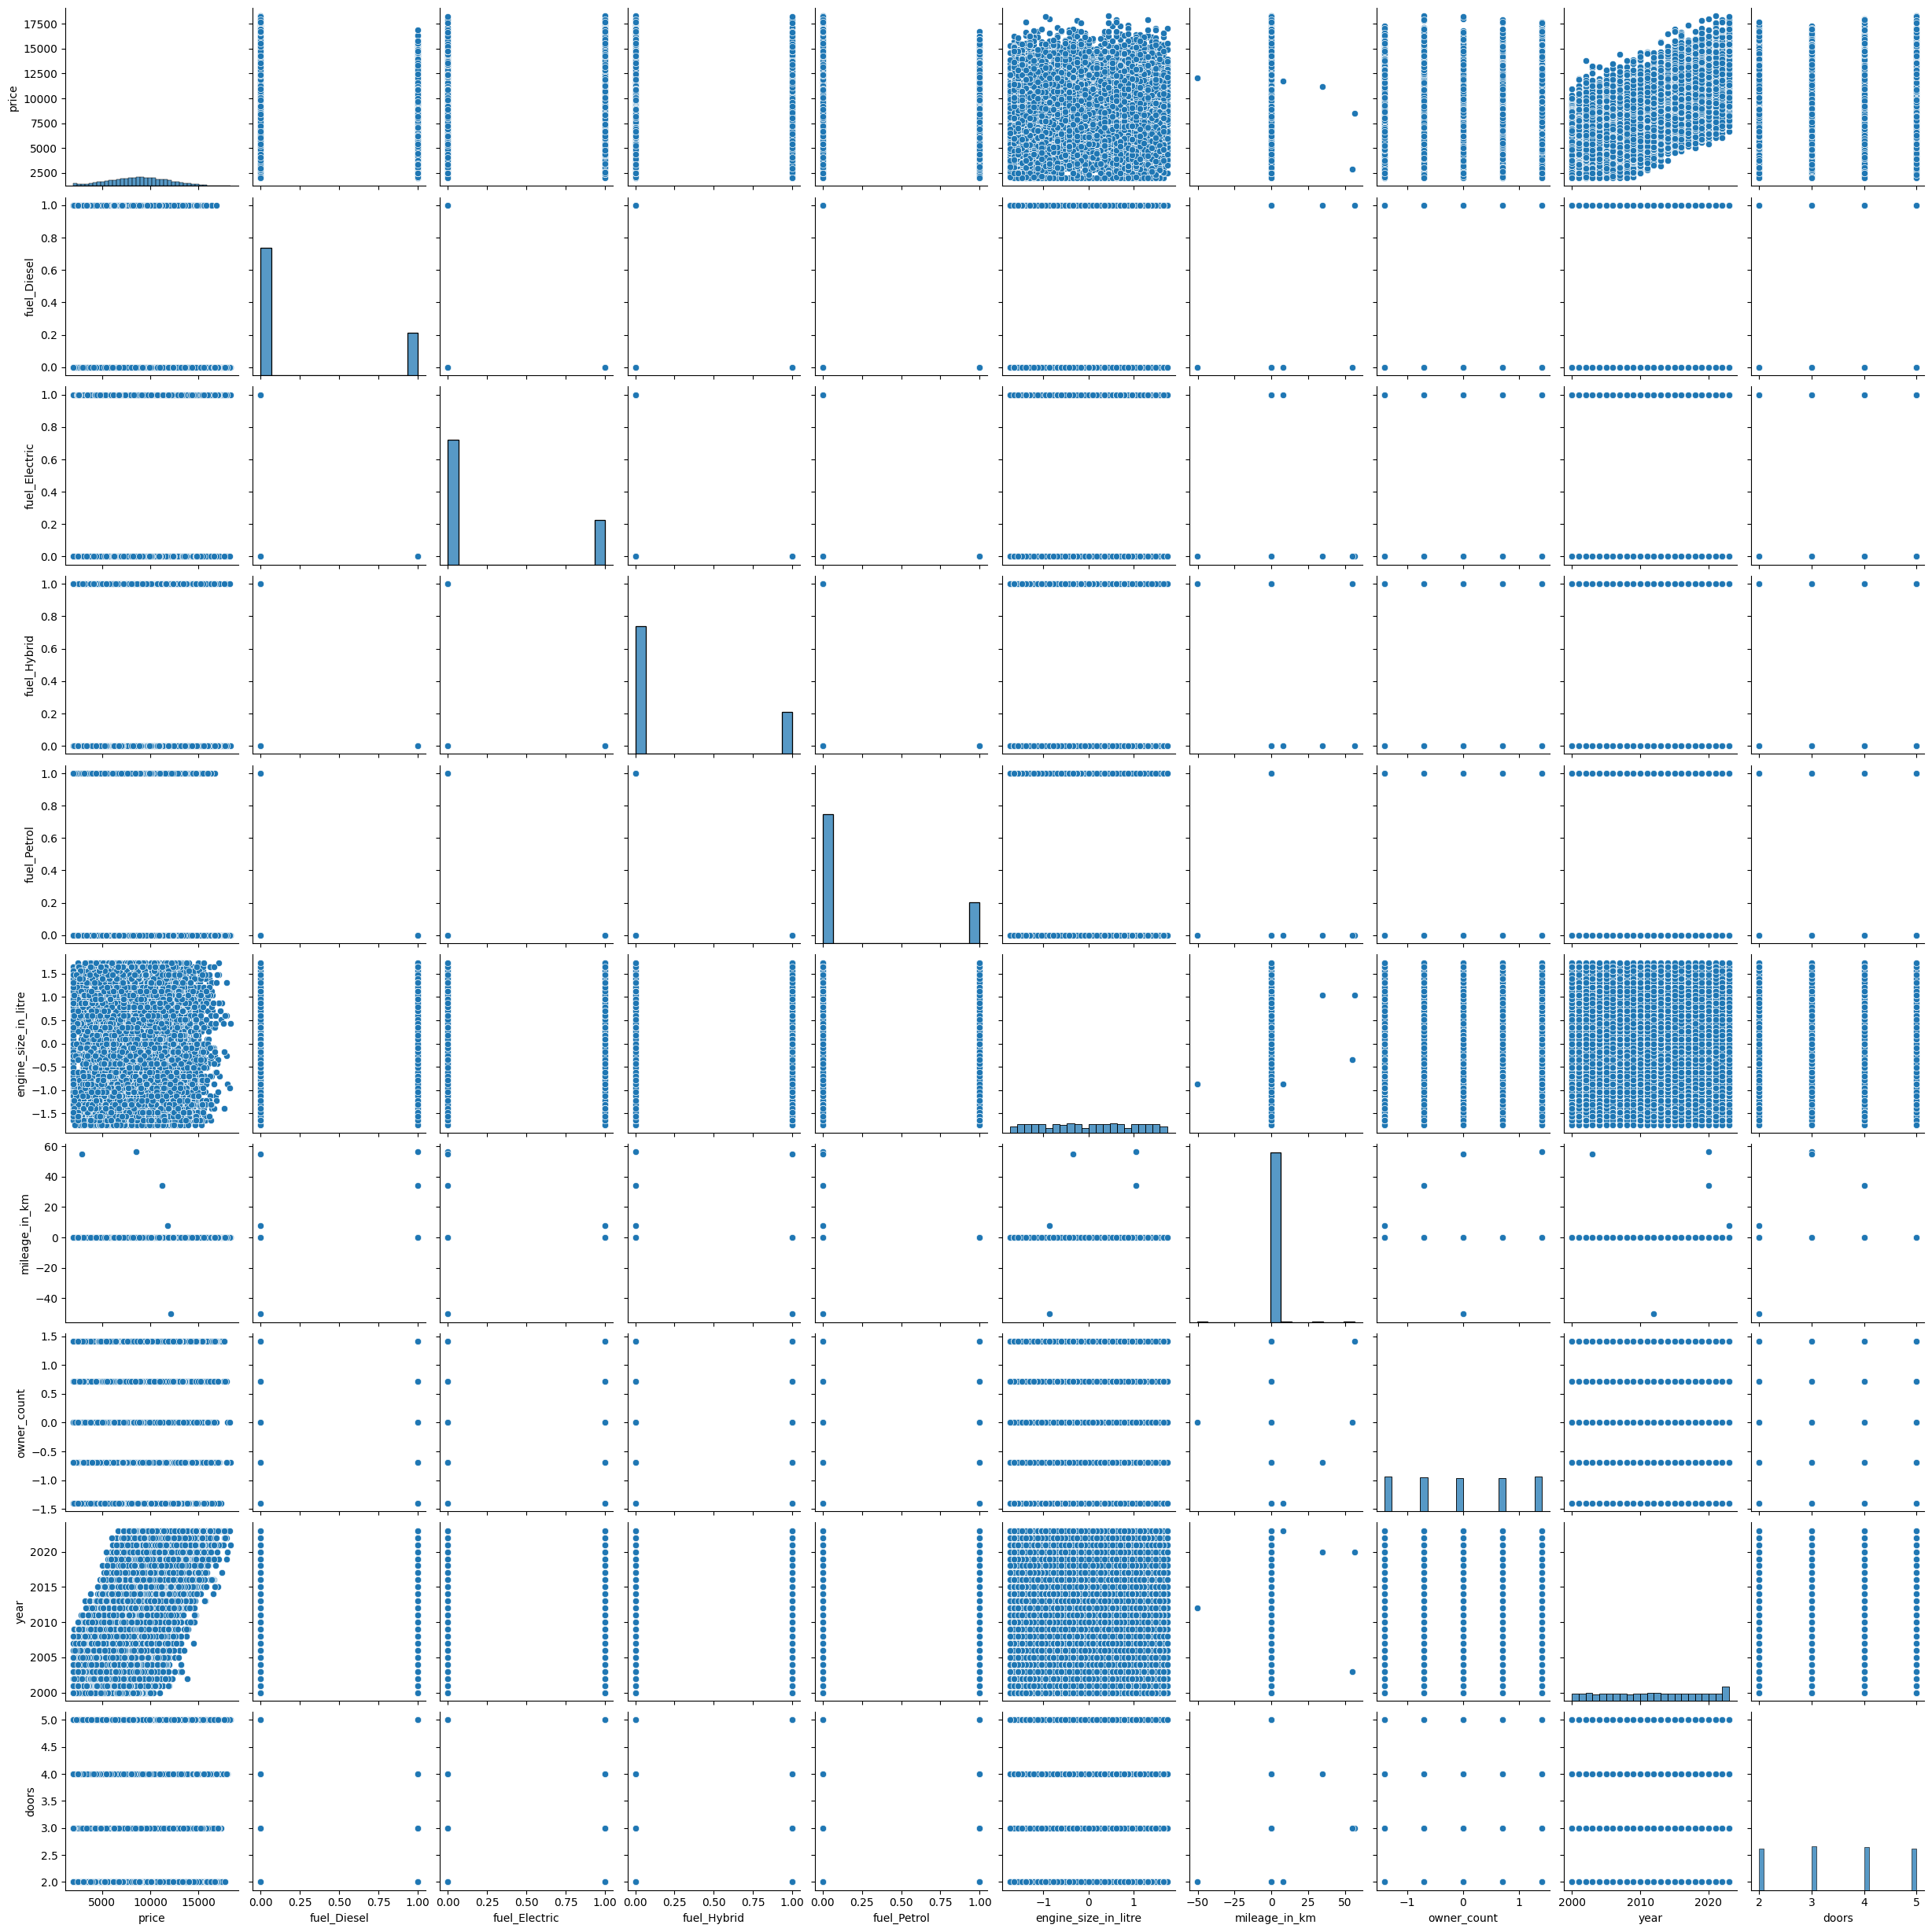

In [90]:
sns.pairplot(df[['price','fuel_Diesel', 'fuel_Electric', 'fuel_Hybrid', 'fuel_Petrol',
       'engine_size_in_litre', 'mileage_in_km', 'owner_count',
        'year','doors']])
plt.show()

#### <u>Year has strong(+ve) correlation with price</u>:
    -Preparing regplot
    -Preparing Residual plot for Distribution

In [91]:
df[['year','price']].corr()
#A string positive correlation of 0.6

,year,price
year,1.000000,0.662549
price,0.662549,1.000000


### <u>Bar plot: Year v/s Price</u>:
    -Shows a strong positive correlation

Text(0, 0.5, 'Price')

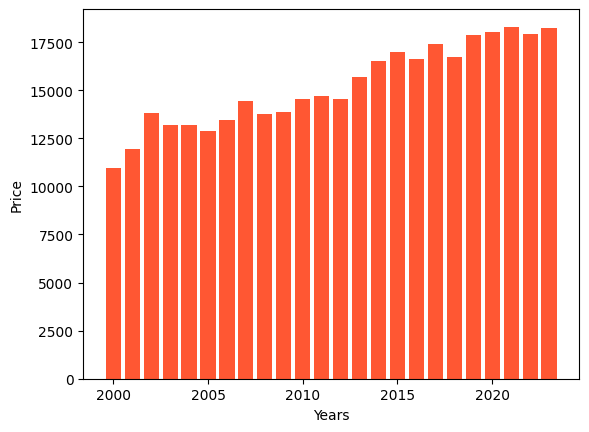

In [92]:
plt.bar(df['year'],df['price'],color='#FF5733')
plt.xlabel('Years')
plt.ylabel('Price')

### <u>Regression plot: Year v/s Price</u>
    -Shows a strong positive correlation
    -Newer the car,costlier it gets

<Axes: xlabel='year', ylabel='price'>

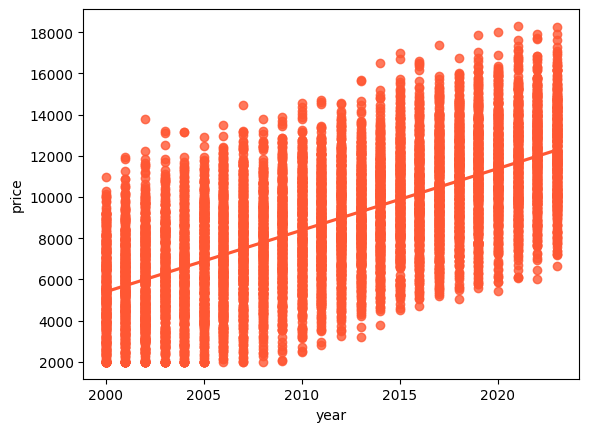

In [93]:
sns.regplot(x='year',y='price',data=df,color='#FF5733')
#Strong posisitve correlation

### <u>Residual Plot: Year v/s Price</u>

<Axes: xlabel='year', ylabel='price'>

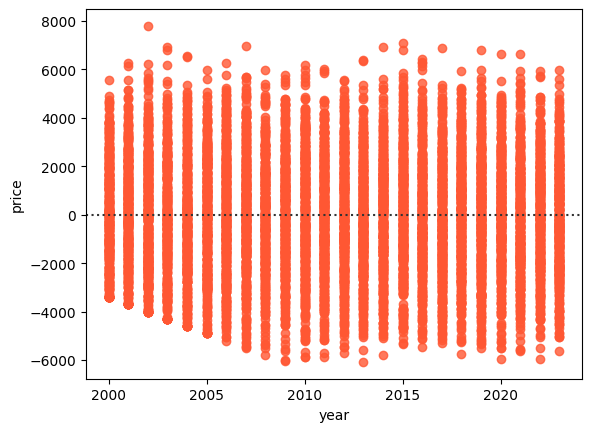

In [94]:
sns.residplot(x='year',y='price',data=df,color='#FF5733')
#uniform variance across x axis
#no curvature seen
#mean of residuals approximately 0

#### <u>Residual Plot Conclusions(3 criterias)</u>:
    -The values are UNIFORMLY DISTRIBUTED along X-Axis
    -There is ABSENCE OF ANY CURVATURE in the plot(hecne Linear relation among variables is established)
    -The MEAN around X-Axis is approximately '0'
#### CONCLUSION: YEAR Variable **ACCEPTED** as predictor variable for Regression

### 3.2 <u>Determining Correlation among **'CATEGORICAL Columns'** with target varible</u>:
    -Visualizing "BOX-Plots"
    -Visualizing "Bar plots"

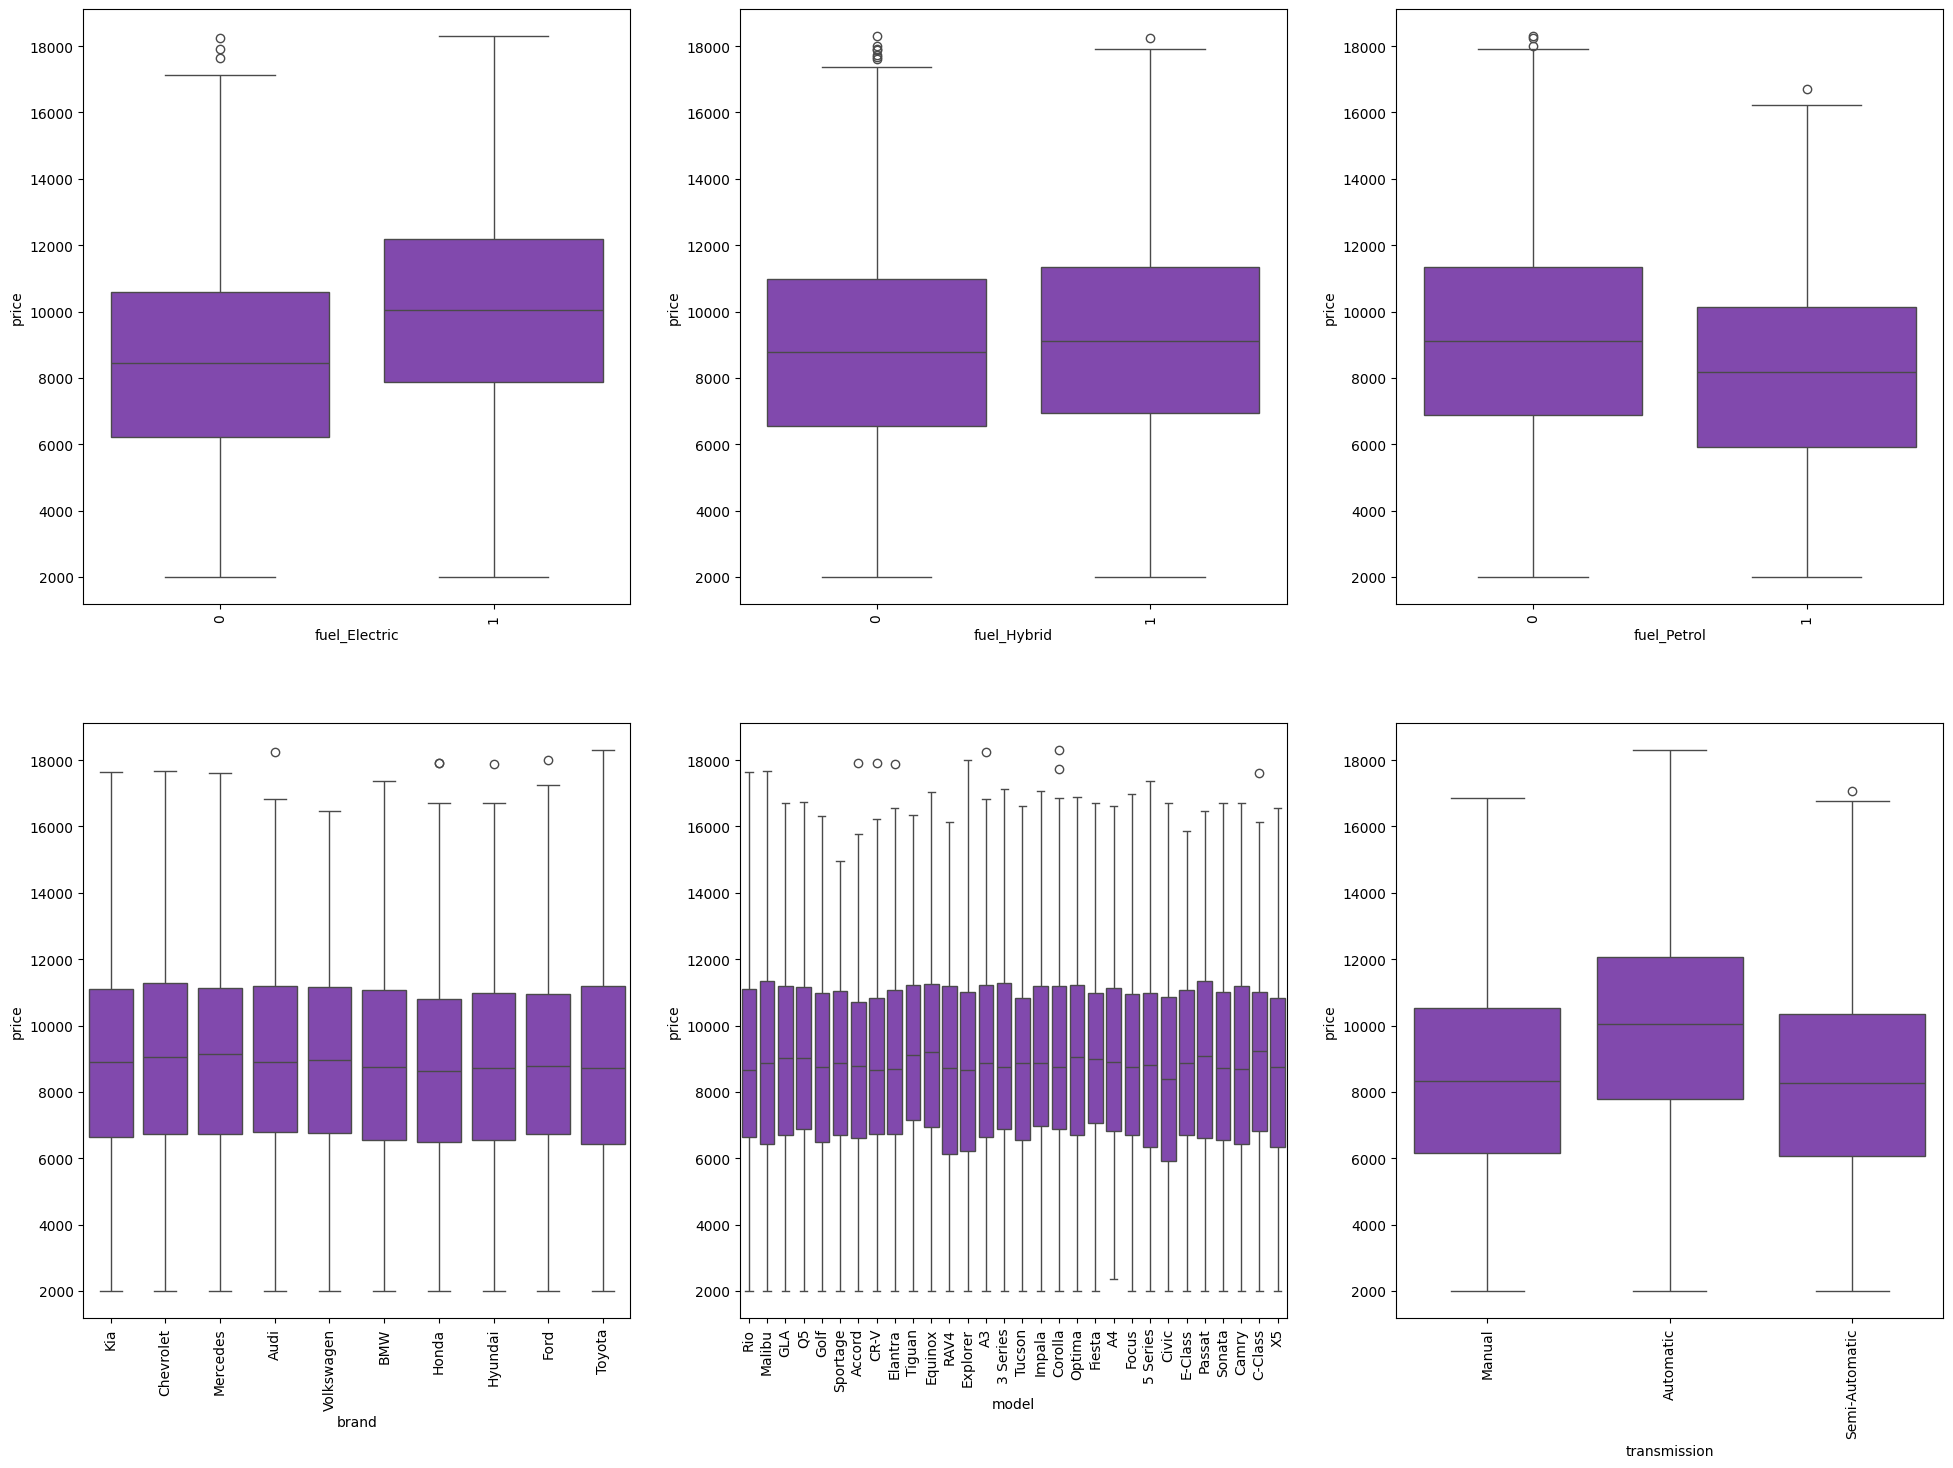

In [95]:
l2=['fuel_Diesel', 'fuel_Electric', 'fuel_Hybrid', 'fuel_Petrol',
       'brand', 'model', 'transmission']
plt.subplots(2, 3, figsize=(24, 17))
for j in range(1,len(l2)):
    plt.subplot(2,3,j)
    sns.boxplot(x=l2[j],y='price',data=df,color='#8338be')
    plt.xticks(rotation=90)
        


### <u>Box Plot conclusions:</u>
    -Brand and Model have OVERLAPPING DISTRIBUTION and hence CANNOT be used for prediction
    -Transmission,Electric,Hybrid and Petrol fuel type have staggered distribution among car prices and hence are viable to become PREDICTOR VARIABLES

### <u>Bar plots:</u>


([0, 1, 2],
 [Text(0, 0, 'Manual'), Text(1, 0, 'Automatic'), Text(2, 0, 'Semi-Automatic')])

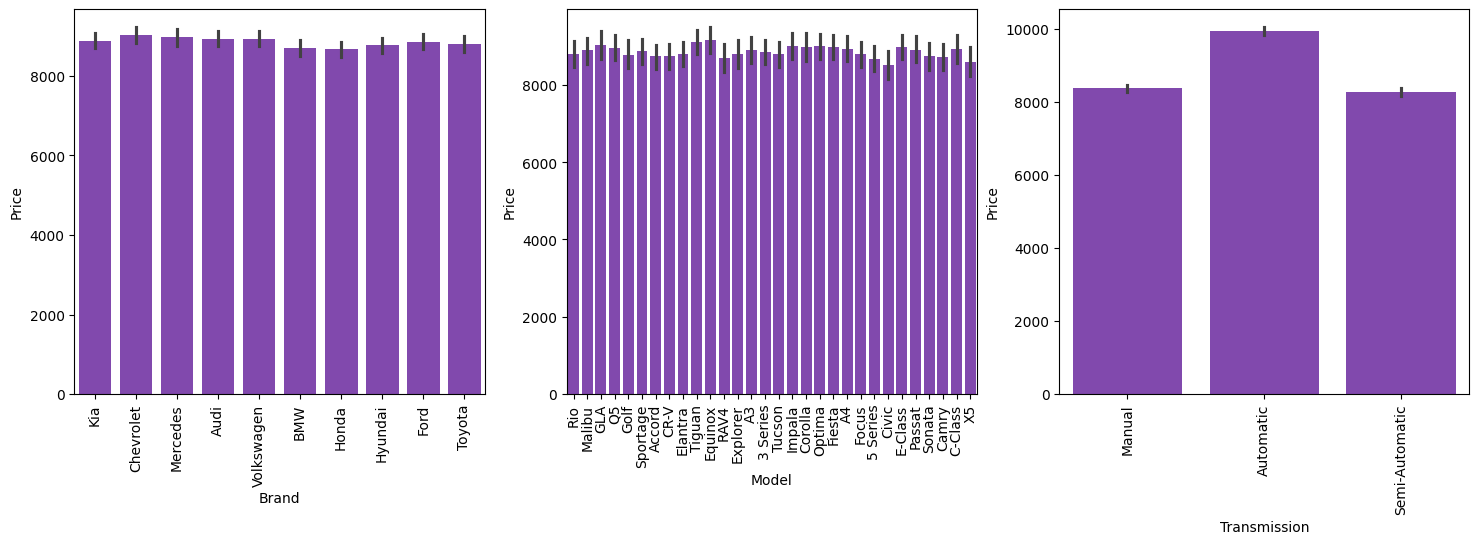

In [96]:
plt.subplots(1,3, figsize=(18,5))



plt.subplot(1,3,1)
sns.barplot(x='brand',y='price',data=df,color='#8338be')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.barplot(x='model',y='price',data=df,color='#8338be')
plt.xlabel('Model')
plt.ylabel('Price')
plt.xticks(rotation=90)


plt.subplot(1,3,3)
sns.barplot(x='transmission',y='price',data=df,color='#8338be')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.xticks(rotation=90)


Text(0, 0.5, 'Price')

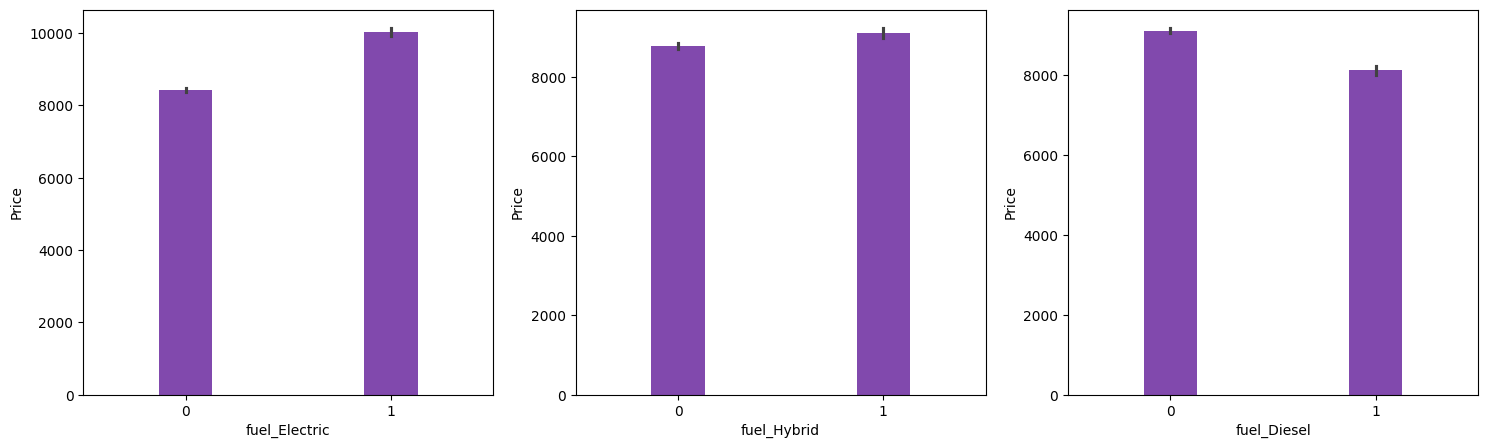

In [97]:
plt.subplots(1,3,figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(x='fuel_Electric',y='price',width=0.26,data=df,color='#8338be')
plt.xlabel('fuel_Electric')
plt.ylabel('Price')


plt.subplot(1,3,2)
sns.barplot(x='fuel_Hybrid',y='price',width=0.26,data=df,color='#8338be')
plt.xlabel('fuel_Hybrid')
plt.ylabel('Price')


plt.subplot(1,3,3)
sns.barplot(x='fuel_Diesel',y='price',width=0.26,data=df,color='#8338be')
plt.xlabel('fuel_Diesel')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

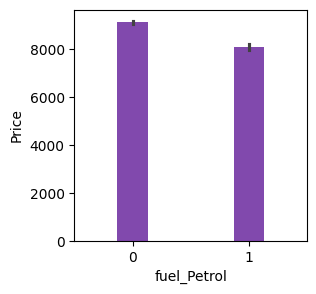

In [98]:
plt.figure(figsize=(3,3))
sns.barplot(x='fuel_Petrol',y='price',width=0.26,data=df,color='#8338be')
plt.xlabel('fuel_Petrol')
plt.ylabel('Price')

### <u>Bar Plot conclusions:</u>
    -Brand and Model have OVERLAPPING DISTRIBUTION and hence CANNOT be used for prediction
    -Transmission,Diesel,Electric,Hybrid and Petrol fuel type have staggered distribution among car prices and hence are viable to become PREDICTOR VARIABLES

-Features Have been **EXTRACTED**,and are ready for Model Development

------------

## 4. **Model Development and Model Training**:
    -Developing and Training "SLR(Simple Linear Regression)" Model
    -Developing and Training "MLR(Multiple Linear Regression)" Model
    -Developing and Training "POLYNOMIAL Regression Model"
    -Predicting Values using SLR,MLR and POLY Models


###  4.1<u>Simple Linear Regression</u>:
    -Predictor Variable: Year
    -Target Variable: Price

In [99]:
df.dropna(axis=0,inplace=True)

#### <u>Model Training</u>:

In [153]:
x=df[['year']]
y=df['price']

slr=LinearRegression()
slr.fit(x,y)

LinearRegression()

#### <u>In-Sample Predictions:</u>

In [154]:
slr_yhat_in_sample=slr.predict(x)
slr_yhat_in_sample

array([11381.6302348 ,  8991.01790128, 11381.6302348 , ...,
       11082.80369311, 10186.32406804,  6002.7524844 ])

###  4.2<u>Multiple Linear Regression</u>:
    -Predictor Variable:fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Petrol,engine_size_in_litre,mileage_in_km,owner_count,year,doors
    -Target Variable: Price

#### <u>Model Training</u>:

In [ ]:
z=df[['fuel_Diesel','fuel_Electric','fuel_Hybrid','fuel_Petrol','engine_size_in_litre','mileage_in_km','owner_count','year','doors']]
mlr=LinearRegression()
mlr.fit(z,y)

LinearRegression()

#### <u>In-Sample Predictions:</u>

In [ ]:
mlr_yhat_in_sample=slr.predict(x)
mlr_yhat_in_sample

array([11381.6302348 ,  8991.01790128, 11381.6302348 , ...,
       11082.80369311, 10186.32406804,  6002.7524844 ])

###  4.3<u>Polynomial Regression</u>:
    -Predictor Variable: Year
    -Target Variable: Price

#### <u>Model Training</u>:

In [ ]:
f=np.polyfit(df['year'],y,3)# 3rd degree polynomial
eq=np.poly1d(f)


#### <u>In-Sample Predictions:</u>

In [106]:
poly_yhat_in_sample=eq(df['year'])
poly_yhat_in_sample


array([11393.06395149,  8983.77991897, 11393.06395149, ...,
       11096.83521932, 10197.05337894,  6013.73296911])

----------------

## 5. **Model Evaluation(In-Sample)**:
    -Calculating MSE(Mean Squared error) for all models
    -Calculating R2(R-Squared) for all the models

###  5.1 <u>**MSE(Mean Squared Error) and R2(R-Squared) for SLR Model:**</u>:

#### 5.1.1 <u>MSE</u>

In [155]:
print(slr.coef_)
print(slr.intercept_)

[298.82654169]
-592247.9839765736


In [109]:
mse_slr=mean_squared_error(y,slr_yhat_in_sample)
mse_slr

np.float64(5436011.787590545)

#### 5.1.2 <u>R2(R-Squared)</u>:

In [110]:
r2_score_slr=slr.score(x,y)
r2_score_slr
#should be as close to 1 as possible

0.43877442754399765

[Text(0.5, 1.0, 'SLR RESIDUAL PLOT')]

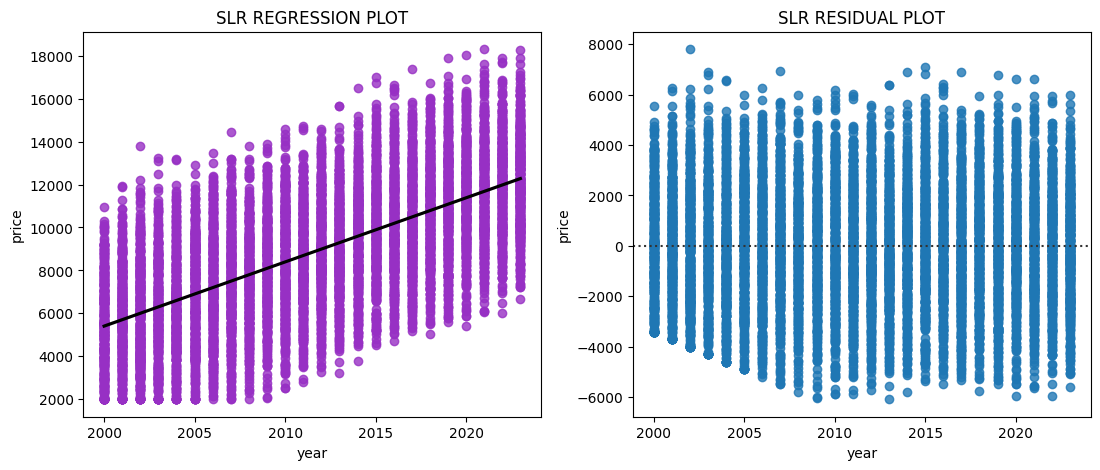

In [111]:
plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
sns.regplot(x='year',y='price',data=df,scatter_kws={"color": "#9730c4"}, line_kws={"color": "black"}).set(title='SLR REGRESSION PLOT')
plt.subplot(1,2,2)
sns.residplot(x='year',y='price',data=df).set(title='SLR RESIDUAL PLOT')

#### <u>Regression Plot Conclusions(3 criterias)</u>:
    -A strong positive Linear correlation is seen between year and price

#### <u>Residual Plot Conclusions(3 criterias)</u>:
    -The values are UNIFORMLY DISTRIBUTED along X-Axis
    -There is ABSENCE OF ANY CURVATURE in the plot(hecne Linear relation among variables is established)
    -The MEAN around X-Axis is approximately '0'




###  5.2 <u>**MSE(Mean Squared Error) and R2(R-Squared) for MLR Model:**</u>:

In [159]:
print(mlr.coef_,'\n\n',mlr.intercept_)

[ 1.83576561e+15  1.83576561e+15  1.83576561e+15  1.83576561e+15
  2.38359375e+01 -4.86250000e+01  1.78906250e+01  2.99625000e+02
 -2.25937500e+01] 

 -1835765613319099.8


#### 5.2.1 <u>MSE</u>:

In [114]:
mse_mlr=mean_squared_error(y,mlr_yhat_in_sample)
mse_mlr

np.float64(5436011.787590545)

#### 5.2.2 <u>R2(R-Squared)</u>:

In [115]:
r2_score_mlr=mlr.score(z,y)
r2_score_mlr

0.5101458345896492

[Text(0.5, 1.0, 'Actual v/s Predicted(In-Sample values)')]

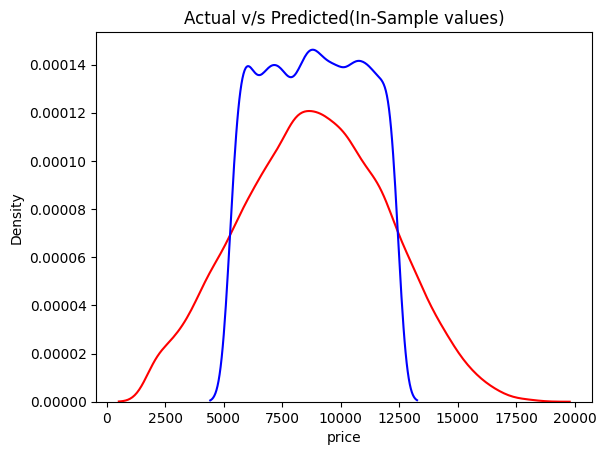

In [116]:
ax1=sns.distplot(df['price'],hist=False,color='r',label='Actual Prices')
sns.distplot(mlr_yhat_in_sample,hist=False,color='b',label='Predicted Prices',ax=ax1).set(title='Actual v/s Predicted(In-Sample values)')

#### <u>Distribution Plot Conclusions</u>:
    -The MLR model overfits and predicts poorly
    -This model is viable for REJECTION

###  5.3 <u>**MSE(Mean Squared Error) and R2(R-Squared) for POLYNOMIAL Model:**</u>:

#### 5.3.1 <u>MSE</u>:

In [117]:
mse_poly=mean_squared_error(y,eq(x))
mse_poly

np.float64(5435740.029089884)

#### 5.3.2 <u>R2(R-Squared)</u>:

In [118]:
r2_score_poly=r2_score(y,eq(x))
r2_score_poly

0.4388024844772904

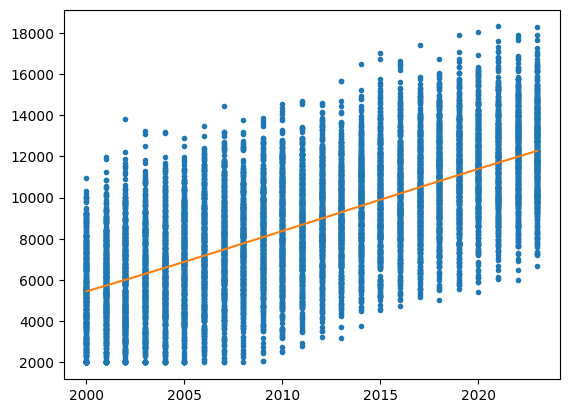

In [119]:
x_new = np.linspace(x.min(),x.max(),100)
y_new = eq(x_new)

plt.plot(x, y, '.', x_new, y_new, '-')


#### <u>Polynomial Plot Conclusions</u>:
    -The model fits similar to a SLR model(due to strong linear correlation between year and price)
    -A SLR model would perform similarly,hence,this model is viable for rejection

###  5.4 <u>**Comparing EVALUATION METRICS for all Models:**</u>:

In [120]:
#Comparing results:
scores={
    'Models':['SLR','MLR','POLY'],
    'MSE(In-sample)':[mse_slr,mse_mlr,mse_poly],
    'R2_Score(In-sample)':[r2_score_slr,r2_score_mlr,r2_score_poly]
}

Evaluation_matrix_in_sample=pd.DataFrame(scores)


In [121]:
Evaluation_matrix_in_sample

,Models,MSE(In-sample),R2_Score(In-sample)
0,SLR,5.436012e+06,0.438774
1,MLR,5.436012e+06,0.510146
2,POLY,5.435740e+06,0.438802


In [122]:
Evaluation_matrix_in_sample['MSE(In-sample)'].min()

np.float64(5435740.029089884)

In [123]:
Evaluation_matrix_in_sample['R2_Score(In-sample)'].max()

np.float64(0.5101458345896492)

#### <u>Evaluation Metrics Conclusions</u>:
    -Polynomial Regression Model has minimum MSE
    -MLR Model has maximum R2(Nearest to 1)

## 6. **Model Testing and Refinement**:
    -Splitting the data into Training and Testing set using train_test_split()
    -Training the models using training data
    -Testing the models using testing data
    -Predicting values using models built to see the efficiency

###  6.1 <u>**Splitting the data into Training and Testing set**</u>:

In [124]:
x_data=df.drop(['price'],axis=1)
y_data=df[['price']]
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

In [ ]:
x_train.reset_index(inplace=True)
x_train.drop('index',axis=1,inplace=True)
y_train.reset_index(inplace=True)
y_train.drop('index',axis=1,inplace=True)
y_train.head()

###  6.2 <u>**SLR Out-Sample Testing**</u>:

In [129]:

slr_outsample_model=LinearRegression()
slr_outsample_model.fit(x_train[['year']],y_train)


LinearRegression()

#### <u>SLR Predictions</u>:

In [130]:
slr_yhat_out_sample=slr_outsample_model.predict(x_test[['year']])
slr_yhat_out_sample

array([[ 8689.61976081],
       [ 9877.21530374],
       [10174.11418947],
       ...,
       [ 8986.51864654],
       [ 6017.52978921],
       [ 7205.12533214]])

###  6.3 <u>**MLR Out-Sample Testing**</u>:

In [131]:
z_train=x_train[['fuel_Diesel','fuel_Electric','fuel_Hybrid','fuel_Petrol','engine_size_in_litre','mileage_in_km','owner_count','year','doors']]
z_test=x_test[['fuel_Diesel','fuel_Electric','fuel_Hybrid','fuel_Petrol','engine_size_in_litre','mileage_in_km','owner_count','year','doors']]
mlr_outsample_model=LinearRegression()
mlr_outsample_model.fit(z_train,y_train)


LinearRegression()

#### <u>MLR Predictions</u>:

In [132]:
mlr_yhat_out_sample=mlr_outsample_model.predict(z_test)
mlr_yhat_out_sample

array([[ 9816. ],
       [11060. ],
       [ 9414. ],
       ...,
       [ 9366.5],
       [ 7164.5],
       [ 8391.5]])

###  6.3 <u>**Polynomial Reg. Out-Sample Testing**</u>:

In [133]:
f_outsample=np.polyfit(x_train['year'],y_train['price'],2)
eq_outsample_model=np.poly1d(f_outsample)

#### <u>Polynomial Reg. Predictions</u>:

In [134]:
eq_yhat_out_smaple=eq_outsample_model(x_test['year'])
eq_yhat_out_smaple

array([ 8717.32727235,  9897.87416502, 10190.05967972, ...,
        9014.23472061,  5992.03848555,  7215.08278025])

-----------------

## 7. **Out-Sample Evaluation of Models and Refinement**:

###  7.1 <u>**MSE-Out Sample**</u>:

#### 7.1.1 <u>SLR</u>:

In [135]:
#slr
mse_slr_outsample=mean_squared_error(y_test,slr_yhat_out_sample)
mse_slr_outsample

np.float64(5371217.496752119)

[Text(0.5, 1.0, 'MSE Out sample trained/tested model')]

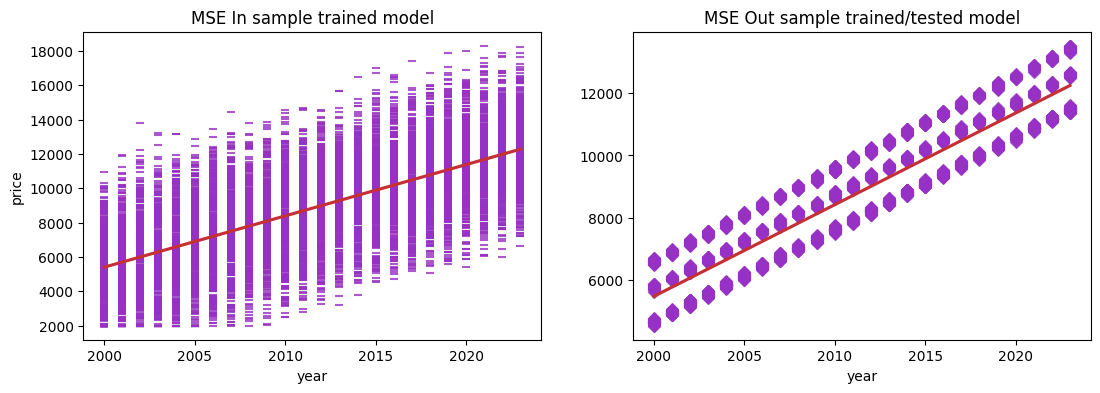

In [136]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.regplot(x=df['year'],y=df['price'],scatter_kws={"color": "#9730c4"}, line_kws={"color": "#c43035"},marker='_').set(title='MSE In sample trained model')
plt.subplot(1,2,2)
sns.regplot(x=x_test['year'],y=mlr_yhat_out_sample,scatter_kws={"color": "#9730c4"}, line_kws={"color": "#c43035"},marker='D').set(title='MSE Out sample trained/tested model')


#### 7.1.2 <u>MLR</u>:

In [137]:
#mlr
mse_mlr_outsample=mean_squared_error(y_test,mlr_yhat_out_sample)
mse_mlr_outsample

np.float64(4794717.696160267)

<Axes: ylabel='Density'>

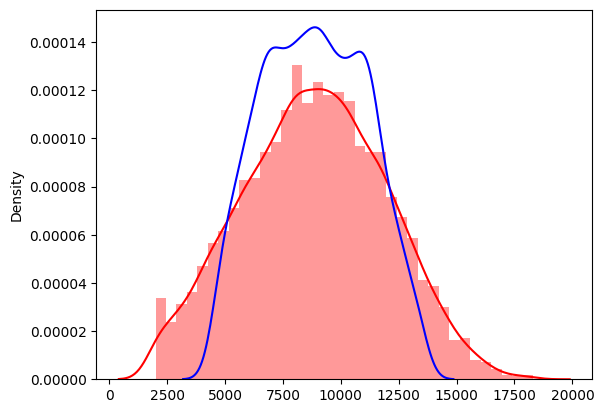

In [138]:
ax2=sns.distplot(y_train,hist=True,color='r',label='Training Values of Prices')
sns.distplot(mlr_yhat_out_sample,hist=False,color='b',label='Predicted price values',ax=ax2)

#### 7.1.3 <u>Polynoial Reg</u>:

In [142]:
#poly
mse_poly_outsample=mean_squared_error(y_test,eq_yhat_out_smaple)
mse_poly_outsample

np.float64(5376253.4644358065)

###  7.2 <u>**R2-Out Sample**</u>:

#### 7.2.1 <u>SLR</u>:

In [143]:
#slr
r2_slr_outsample=slr_outsample_model.score(x_test[['year']],y_test)
r2_slr_outsample

0.4535582675248182

#### 7.2.2 <u>MLR</u>:

In [144]:
#mlr
r2_mlr_outsample=mlr_outsample_model.score(z_test,y_test)
r2_mlr_outsample

0.5122085735303927

#### 7.2.3 <u>Polynomial Reg</u>:

In [145]:
#poly
r2_poly_outsample=r2_score(y_test,eq_outsample_model(x_test['year']))
r2_poly_outsample

0.4530459324895254

###  7.3 <u>**Model Refinement using RIDGE REGRESSION**</u>:
    -Refining the overfit MLR model using Ridge Regression
    -Alpha=0.001

In [160]:
ridge_model=Ridge(alpha=0.0001)
ridge_model.fit(x_train[['fuel_Diesel','fuel_Electric','fuel_Hybrid','fuel_Petrol','engine_size_in_litre','mileage_in_km','owner_count','year','doors']],y_train)

Ridge(alpha=0.0001)

In [161]:
ridge_model_yhat_outsample=ridge_model.predict(x_test[['fuel_Diesel','fuel_Electric','fuel_Hybrid','fuel_Petrol','engine_size_in_litre','mileage_in_km','owner_count','year','doors']])
ridge_model_yhat_outsample

array([[ 9861.11233642],
       [11109.39089717],
       [ 9400.78142629],
       ...,
       [ 9383.78282178],
       [ 7202.06185294],
       [ 8431.44035333]])

#### 7.3.1 <u>Distributuin Plot of Ridge Regression</u>:

<Axes: ylabel='Density'>

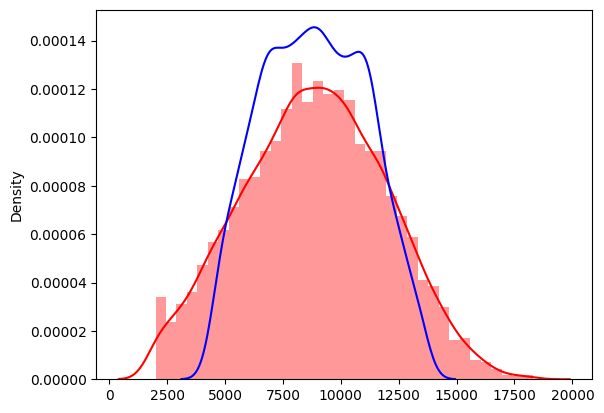

In [162]:
#evaluation
ax3=sns.distplot(y_train,hist=True,color='r',label='Training Values of Prices')
sns.distplot(ridge_model_yhat_outsample,hist=False,color='b',label='RIDGED-Predicted price values',ax=ax3)

#### <u>Distplot Conclusions</u>:
    -The Ridge Model performs better than the original MLR model

###  7.4 <u>**Evaluation Metrics for all the Models**</u>:

In [146]:
dict_out_sample={
    'Models':['SLR','MLR','POLY'],
    'MSE(Out sample)':[mse_slr_outsample,mse_mlr_outsample,mse_poly_outsample],
    'R2(Out sample)':[r2_slr_outsample,r2_mlr_outsample,r2_poly_outsample]
}
Out_sample_evaluation_matrix=pd.DataFrame(dict_out_sample)

In [147]:
Out_sample_evaluation_matrix

,Models,MSE(Out sample),R2(Out sample)
0,SLR,5.371217e+06,0.453558
1,MLR,4.794718e+06,0.512209
2,POLY,5.376253e+06,0.453046


In [148]:
Out_sample_evaluation_matrix['MSE(Out sample)'].min()
#SLR PERFORMED BEST

np.float64(4794717.696160267)

In [149]:
Out_sample_evaluation_matrix['R2(Out sample)'].max()
#SLR PERFORMED THE BEST

np.float64(0.5122085735303927)

#### <u>Evaluation Metrics Conclusions</u>:
    -SLR Model has the least MSE
    -SLR Model has the max R2(Nearest to 1)

## **'SLR MODEL' SELECTED For Prediction**

--------------

## 8. **Cross Validation**:
    -Using cross_val_score and cross_val_predict
    -Folds=4

###  8.1 <u>**Cross validating R2 values for SLR model**</u>:

In [150]:

slr_cross_score=cross_val_score(slr_outsample_model,x_data[['year']],y_data,cv=4)
slr_cross_score


array([0.43732046, 0.44316423, 0.4313869 , 0.44197449])

###  8.2 <u>**Cross validating R2 values for MLR model**</u>:

In [151]:

mlr_cross_score=cross_val_score(mlr_outsample_model,x_data[['engine_size_in_litre', 'mileage_in_km', 'owner_count',
        'year', 'doors']],y_data,cv=4)
mlr_cross_score


array([0.43768287, 0.44247837, 0.43087619, 0.44152545])

## 8. **Final Price Prediction by taking input from user**:
    -Selected model:SLR REGRESSION MODEL
    -Function:make_prediction_by_SLR
    -Input: Year of manufacturing
    -Output: Predicted price of the car

In [152]:
def make_prediction_by_SLR(year):
    val=np.array(year).reshape(-1,1)#reshaping as the input had to be an array of same length,that was used to train the model
    prediction=slr_outsample_model.predict(val)
    print(f'The predicted value of a car made in year {year} is :${prediction}')

year=int(input('Enter the year of production of car: '))
make_prediction_by_SLR(year)

The predicted value of a car made in year 2007 is :$[[7502.02421787]]


### **OUTPUT**:The Predicted value of a Car made in **Year** **2007** is :**<span style='color:#FF5733'>$7502.024</span>**

-----------

## 9. **Final Remarks and Conclusions**:
    -Given the data source,Supervised Learning with Regression was adopted to predict a Continous Numerical Value.
    -Among the 3 Models built(SLR MLR and Polynimial),SLR performed best in Evaluation Metrics Like MSE and R2.
    -The Regression plots and Residual Plots of SLR show a STRONG POSITIVE LINEAR RELATIONSHIP among Year and Price.
    -The Final Predictions also testify the same trend.
    -The newer the car,the costlier it gets.
    -The model estimates not only the relationship among Year and Price,but also the STRENGTH of such a relationship that exists.

____END____

##### 
<span style='color:#FF5733'>  **'*'** **DISCLAIMER**</span>:
    -This project is a sole Intellectual property of mine i.e.<span style='color:#FF5733'> **GANDHARV GUPTA**</span>.Kindly acknowledge before copy or use of this project.The dataset is    open and is a property of Kaggle which holds all proprietary rights over it.</span>

--------